This notebook is part of the various tests for scimap. It's intended to allow for visual evaluation of fits, etc.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%pdb off

import math

from matplotlib import pyplot as plt
import pandas as pd
import scimap
import numpy as np
from scipy import fftpack, signal, integrate
import mpld3
mpld3.enable_notebook()

Automatic pdb calling has been turned OFF


## Prepare HDF File for Later Unit Tests


In [ ]:
scimap.import_aps_34IDE_map(
    directory="test-data-xrd/xrd-map-34-ID-E/",
    wavelength=0.4959,
    shape=scimap.shape(rows=13, columns=11),
    step_size=scimap.default_units.um(1),                      
    beamstop=0.49,                            
    hdf_filename="test-data-xrd/xrd-map-34-ID-E.hdf"
);

# Corundum

Automatic pdb calling has been turned ON


(-1, 160)

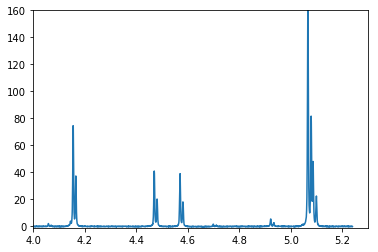

/home/mwolf/miniconda3/envs/xrdmapping/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-22 16:38:07.958017. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [11]:
%pdb on

corundum = scimap.standards.Corundum()
# Get sample data from Mew XRD
corundum_scan = scimap.XRDScan(filename="test-data-xrd/corundum.xye",
                                phase=corundum)
scan = corundum_scan
df = scan.diffractogram
q = df.index
I = df.counts
# Remove expected XRD peaks
for reflection in corundum.reflection_list:
    q, I = scimap.peakfitting.remove_peak_from_df(x=q, y=I, xrange=reflection.qrange)
# Do the background fitting
refinement = scimap.native_refinement.NativeRefinement(phases=[corundum])
bg = refinement.refine_background(q, I)
# assert False, "TODO: Write a test for making sure the bg fit is good"
# plt.plot(df.index, df.counts)
plt.plot(df.index, df.counts - refinement.background(df.index))

plt.xlim(4, 5.3)
plt.ylim(-1, 160)

## Remove a Peak

5404 5404


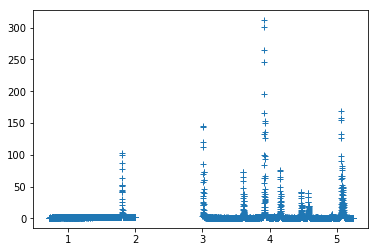

/home/mwolf/miniconda3/envs/xrdmapping/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-22 16:38:19.024778. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [12]:
q, y = scimap.remove_peak_from_df(x=corundum_scan.scattering_lengths,
                          y=corundum_scan.intensities,
                          xrange=(2, 3))
print(len(q), len(y))
plt.plot(q, y, marker='+', linestyle="None")

## Peak Fitting

In [19]:

%pdb off

# Converted old unit-test angles to q
celref_peaks = [
            ('012', 3.4746228816945104, 25.637288649553085),
            ('104', 2.5479680737754244, 35.22223164557721),
            ('110', 2.375, 37.88141047624646),
            ('006', 2.1636666666666664, 41.74546075011751),
            ('113', 2.0820345582756135, 43.46365474219995),
            ('024', 1.7373114408472552, 52.68443192186963),
            ('116', 1.5994489779586798, 57.62940019834231),
]
two_theta = np.array([p[2] for p in celref_peaks])

scimap.twotheta_to_q(two_theta, scimap.tubes['Cu'].kalpha)

Automatic pdb calling has been turned OFF


array([ 1.80822894,  2.46585258,  2.64543732,  2.90382698,  3.0176798 ,
        3.61645787,  3.92817384])

/home/mwolf/miniconda3/envs/xrdmapping/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-22 16:40:55.430497. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


(-100, 1000)

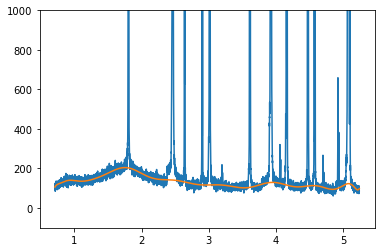

/home/mwolf/miniconda3/envs/xrdmapping/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-22 16:40:59.703101. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [20]:
# Check background fitting
scan = scimap.XRDScan(filename="test-data-xrd/corundum.brml",
                      phase=scimap.standards.Corundum())

df = scan.diffractogram

# mpld3.disable_notebook()

bg = scan.refinement.refine_background(scattering_lengths=df.index,
                                       intensities=df.counts, k=2)

x = scimap.q_to_twotheta(df.index, wavelength=1.5418)
plt.plot(df.index, df.counts)
plt.plot(df.index, bg)

plt.ylim(-100, 1000)

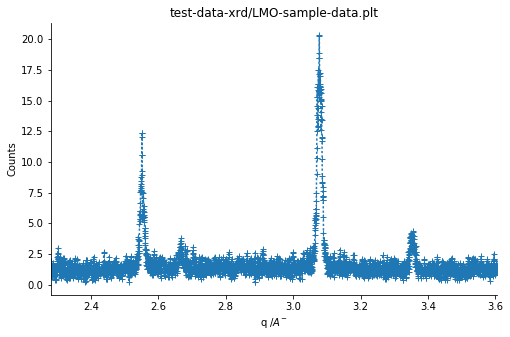

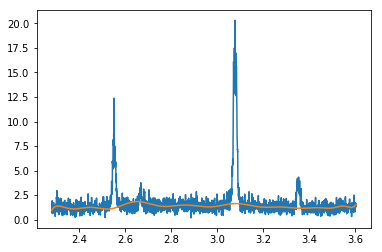

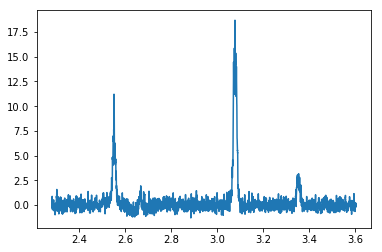

/home/mwolf/miniconda3/envs/xrdmapping/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-22 16:41:03.775645. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [21]:
## Check background fitting for mapping data
scan = scimap.XRDScan(filename="test-data-xrd/LMO-sample-data.plt",
                      phase=scimap.lmo.CubicLMO())
scan.plot_diffractogram()

plt.figure()
df = scan.diffractogram
bg = scan.refinement.refine_background(scattering_lengths=df.index,
                                       intensities=df.counts, k=2)

x = scimap.q_to_twotheta(df.index, wavelength=1.5418)
plt.plot(df.index, df.counts)
plt.plot(df.index, bg)

plt.figure()
plt.plot(df.index, df.counts - bg)

In [22]:
# Plot fitting for a peak
scan = scimap.XRDScan(filename="test-data-xrd/corundum.brml",
                     phase=scimap.standards.Corundum())
df = scan.diffractogram
scan.refinement.fit_peaks(scattering_lengths=df.index, 
                          intensities=df['subtracted'])
scan.refinement.plot(df.index)

NotImplementedError: Disabled due to bad background fitting.

/home/mwolf/miniconda3/envs/xrdmapping/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-22 16:41:23.097278. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


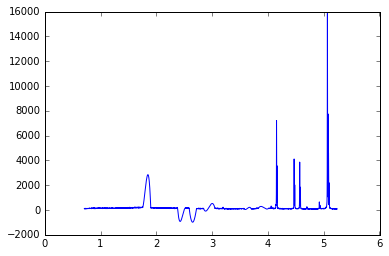

In [25]:
scan = scimap.XRDScan(filename="test-data-xrd/corundum.brml",
                     phase=scimap.standards.Corundum())
plt.plot(scan.scattering_lengths, scan.background())

# Guassian Curve for Testing Fits

/usr/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


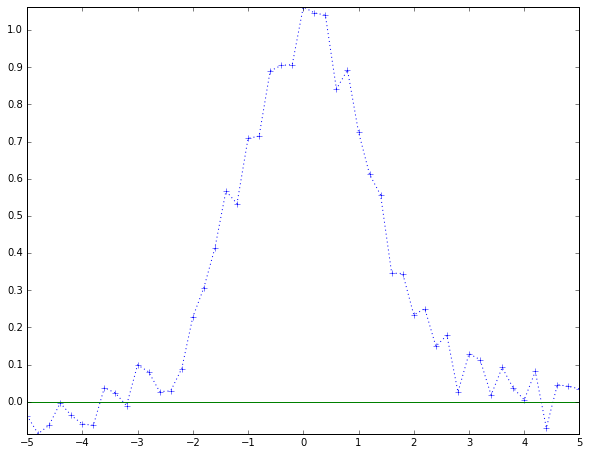

In [131]:
x = np.linspace(-5, 5, num=51)
a = 1
b = 0
c = 2 / 2*math.sqrt(2*math.log(2))
y = a * np.exp(-(x-b)**2/(2*c**2))
rands = (np.random.rand(*x.shape)-0.5) / 5
plt.figure(figsize=(0.9*11, 0.9*8.5))
plt.plot(x, y + rands, marker="+", linestyle=":")
# plt.plot(x, rands)
plt.xlim(-5, 5)
plt.xticks(np.arange(-5, 6, step=1))
plt.yticks(np.arange(0, 1.1, step=0.1));
plt.savefig('/home/mwolf/gaussian_curve.pdf')

# FFT Transform
ffty = fftpack.fft(x=y+rands)
# fftx = fftpack.fftfreq(n=x)
ffty[0:52] = 0
newy = fftpack.ifft(ffty)
# plt.figure()
plt.plot(x, newy)
# plt.plot(range(0, len(ffty)), ffty)

# Kα1/Kα1 Splitting
The graph below is based on X-ray energies taken from NIST: http://physics.nist.gov/cgi-bin/XrayTrans/search.pl?download=tab&element=All&trans=KL2&trans=KL3&lower=&upper=&units=eV

It shows that the splitting between $k_{α1}$ and $k_{α2}$ is propritional to the square of the $k_α^2$ value itself.

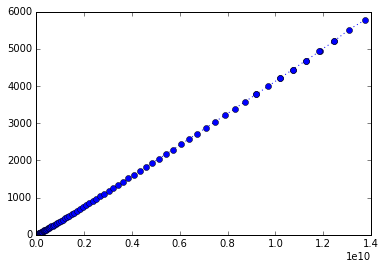

In [114]:
data = pd.read_csv('test-data-xrd/xray-energies.csv', skiprows=4, sep="\t")
kalpha1 = data[data['Trans.'] == "KL2"]
kalpha2 = data[data['Trans.'] == "KL3"]

# convert to separate numpy arrays
Z = kalpha1['Num'].values
assert np.all(np.equal(Z, kalpha2['Num'].values))
kalpha1 = kalpha1['Direct (eV)'].values
kalpha2 = kalpha2['Direct (eV)'].values

kalpha = (kalpha1 + 0.5 * kalpha2)/1.5
split = (kalpha2-kalpha1)

plt.plot(kalpha**2, split, marker="o", linestyle=":")

## Importing of GADDS Map

In [4]:
scimap.write_gadds_script(qrange=(1, 5), sample_name="xrd-map-gadds", center=(0, 0), hexadecimal=False, collimator=0.8)
scimap.import_gadds_map(directory="test-data-xrd/xrd-map-gadds/", tube="Cu", hdf_filename='xrd-map-gadds.h5', hdf_groupname='xrd-map-gadds')

Group "xrd-map-gadds" exists. Overwriting.
Saving to HDF5 file xrd-map-gadds.h5 in group xrd-map-gadds
Running 397 scans (4 frames each). ETA: 476400s (5d 12h 20m).
Integration range: 14.095657849305525° to 94.09565784930552°


In [5]:
gaddsmap = scimap.XRDMap(hdf_filename="xrd-map-gadds.h5", sample_name="xrd-map-gadds", Phases=[scimap.lmo.CubicLMO])
gaddsmap.refine_mapping_data()
# gaddsmap.plot_map(metric="a")

Refining: 100%|██████████| 397/397 [00:16<00:00, 24.07it/s]


In [200]:
gaddsmap.plot_map_gtk()

/home/mwolf/src/scimap/mapping/map.py:504: UserWarning: 
  warnings.warn(UserWarning(), "Not implemented")


Todo: re-implement the local image plotting


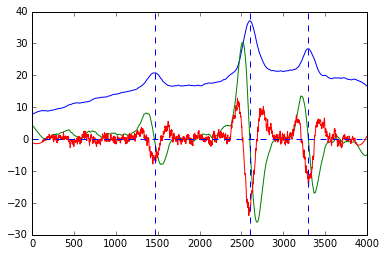

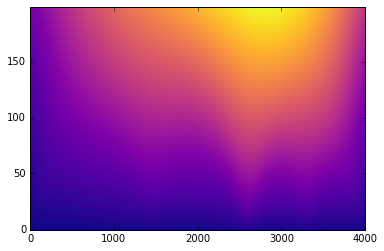

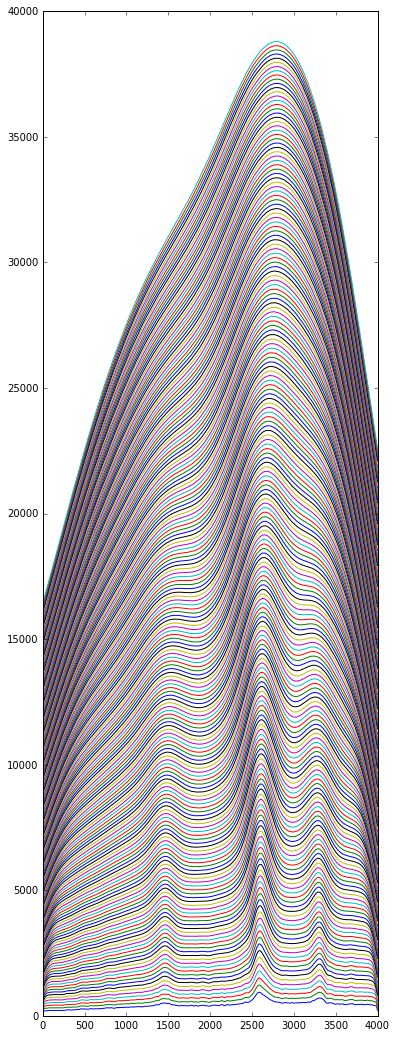

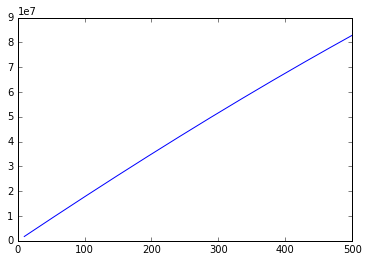

In [195]:
# Refine background
gaddsmap = scimap.XRDMap(hdf_filename="xrd-map-gadds.h5", sample_name="xrd-map-gadds", Phases=[scimap.lmo.CubicLMO])
with gaddsmap.store() as store:
    I0 = store.intensities[0]
    q = store.scattering_lengths[0]
I = signal.savgol_filter(I0, 251, polyorder=2)

plt.plot(I)
deriv = signal.savgol_filter(np.diff(I), 251, 3)
deriv2 = np.diff(deriv)
plt.plot(deriv*250)
plt.plot(deriv2*10000)
plt.axhline(0, linestyle="--")

widths = np.linspace(10, 500, 200)
peakidx = signal.find_peaks_cwt(I, wavelet=signal.gaussian, widths=widths)
for peak in peakidx:
    plt.axvline(peak, linestyle="--")

cwt = signal.cwt(I0, wavelet=signal.gaussian, widths=widths)

plt.figure()
plt.imshow(cwt, aspect="auto", origin="lower", cmap='plasma')

plt.figure(figsize=(6, 18))
for idx, c in enumerate(cwt):
    plt.plot(c-I0+50 * idx)

areas = [integrate.trapz(d-I) for d in cwt]
plt.figure()
plt.plot(widths, areas)